# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 2

Do wykonania zadań proszę zapoznać się z metodami, właściwościami, oraz funkcjami:
`__repr__`, `__str__`, `__add__`, `__sub__`, `__eq__`, `__lt__`, `__gt__`, `__le__`, `__ge__`, `__ne__`, `__hash__`, `__truediv__`, `__mul__`, `__class__`, `__name__`, `id`.

Operatory: https://docs.python.org/3/library/operator.html


**UWAGA**: W ninejszym laboratorium proszę nie korzystać z zewnętrzych modułów/bibliotek (poza biblioteką _matplotlib_).

**UWAGA 2**: Obsługę błędów należy zrealizować w postaci wyjątków.

### Zadanie 1

Napisz klasę `Vector` udostępniającą funkcjonalność:
- reprezentuje wektor dowolnej długości,
- obiekt inicjowany listą (np. `Vector([1, 2, 3])`,
- posiada funkcję zwracającą moduł wektora,
- umożliwia dodawanie (`+`) i odejmowanie (`-`) wektorów. Dodaj obsługę błędów (różna długość (liczba elementów) wektora),
- możliwość wyświetlenia wektora jako listy za pomocą funkcji `print(v)` (metoda `__str__`),
- uruchomienie komórki zawierającej jedynie nazwę zmiennej (typu `Vector`) spowoduje wyświetlenie nazwy typu `Vector`, adresu zmiennej w pamięci (funkcja `id`) oraz jej zawartości, np. `<Vector([1, 2, 3]) at 140185630442880>` (metoda `__repr__`)

In [18]:
import math
import matplotlib.pyplot as plt


class IncompatibileVectorsSizes(Exception):
    pass


class InvalidVectorDimensionException(Exception):
    pass


class Vector:
    
    def __init__(self, data):
        self.data = tuple(data)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, indices):
        return self.data[indices]
    
    def __neg__(self):
        return Vector([-e for e in self])
    
    def __add__(self, other):
        self.__check_size(other)
        return Vector([e1+e2 for e1, e2 in zip(self, other)])
    
    def __iter__(self):
        return iter(self.data)
    
    def __sub__(self, other):
        return self + (-other)
    
    def __str__(self):
        return str(self.data)
    
    def __repr__(self):
        return f'<{self.__class__.__name__}({str(self)}) at {id(self)}>'
    
    def module(self):
        return math.sqrt(sum([e**2 for e in self]))
    
    def __check_size(self, other):
        if len(self) != len(other):
            raise IncompatibileVectorsSizes()
    
    def __lt__(self, other):
        return self.__compare(other, lambda a, b: a < b)
    
    def __le__(self, other):
        return self.__compare(other, lambda a, b: a <= b)
    
    def __gt__(self, other):
        return self.__compare(other, lambda a, b: a > b)
    
    def __ge__(self, other):
        return self.__compare(other, lambda a, b: a >= b)
    
    def __eq__(self, other):
        return self.__compare(other, lambda a, b: a == b)
    
    def __ne__(self, other):
        return self.__compare(other, lambda a, b: a != b)
    
    def __compare(self, other, fun):
        self.__check_size(other)
        return Vector([fun(a, b) for a, b in zip(self, other)])
    
    def plot(self, ax=None):
        if len(self) != 2:
            print('Error: Plotting only 2D Vectors is possible')
            return
            
        if ax is None:
            _, ax = plt.subplots()

        ax.arrow(0, 0, self[0], self[1], length_includes_head=True, head_width=0.2)
        ax.grid()
        
    def __hash__(self):
        return hash(self.data)
    
    def __truediv__(self, other):
        if other == 0:
            raise ZeroDivisionError('Unable to divide by zero')

        return Vector([e / other for e in self])
    
    def __mul__(self, other):
        return Vector([e * other for e in self])

In [13]:
a = Vector([7, 5, 3])
b = Vector([3, 10, 1])

print('str(a):', str(a))
print('str(b):', str(b))
print('repr(a)', repr(a))
print('repr(b)', repr(b))
print('len(a):', len(a))
print('len(b):', len(b))
print('a.module():', a.module())
print('b.module():', b.module())
print('a+b:', a+b)
print('a-b:', a-b)

try:
    c = Vector([1, 2])
    a + c
except IncompatibileVectorsSizes:
    print('a+c: Incompatibile sizes')

str(a): (7, 5, 3)
str(b): (3, 10, 1)
repr(a) <Vector((7, 5, 3)) at 2072417281408>
repr(b) <Vector((3, 10, 1)) at 2072417481872>
len(a): 3
len(b): 3
a.module(): 9.1104335791443
b.module(): 10.488088481701515
a+b: (10, 15, 4)
a-b: (4, -5, 2)
a+c: Incompatibile sizes


### Zadanie 2

Do wcześniej zaimplementowanej klasy dopisz funkcje pozwalające na porównanie wektorów (ich modułów) za pomocą operatorów: `==`, `>=`, `<=`, `>`, `<`, `!=`. Porównanie ma zostać wykonane na poziomie elementów wektorów (_element wise_), poniżej przykład:

```ipython
 In [1]: a = Vector([1, 2, 3]) \
    ...: b = Vector([3, 2, 1]) \
    ...: a <= b
Out [1]: <Vector([True, True, False]) at 140185575662832>
```

In [15]:
a = Vector([7, 3, 5])
b = Vector([3, 7, 5])

print(a < b)
print(a > b)
print(a == b)
print(a != b)
print(a <= b)
print(a >= b)

(False, True, False)
(True, False, False)
(False, False, True)
(True, True, False)
(False, True, True)
(True, False, True)


### Zadanie 3

Do klasy `Vector` dopisz funkcję umożliwiającą wyświetlenie wektora na wykresie (zaimplementuj wyświetlanie za pomocą biblioteki `matplotlib`. 

> **UWAGA**: Funkcja powinna działać tylko dla wektora o dwóch wymiarach (dwuelementowa lista) - wykres 2D i wyświetlać komunikat jeżeli wymiar jest inny.

> Podpowiedź: możesz wykorzystać funkcję [matplotlib.pyplot.arrow](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.arrow.html)

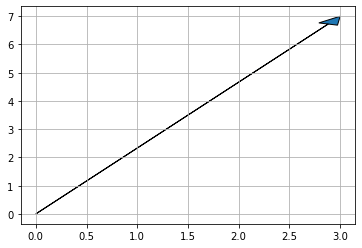

In [20]:
a = Vector([3, 7])
a.plot()

In [19]:
a = Vector([1, 2, 3])
a.plot()

Error: Plotting only 2D Vectors is possible


### Zadanie 4

Dodaj możliwość zastosowania obiektu klasy `Vector` jako klucza w słowniku. Np.:

```python
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]
```

In [21]:
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]

'Wektor 2'

### Zadanie 5

Dodaj funkcjonalność:
- dzielenia przez skalar (np. `Vector([2, 4]) / 2`),
- mnożenia przez skalar (np. `Vector([2, 4]) * 2`).

> Podpowiedź: Pamiętaj o obsłudze błędów.

In [22]:
Vector([2, 4]) / 2

<Vector((1.0, 2.0)) at 2072445621200>

In [23]:
Vector([2, 4]) * 2

<Vector((4, 8)) at 2072417423264>

In [24]:
try:
    Vector([2, 3]) / 0
except ZeroDivisionError:
    print('Error: Unable to divide by zero')

Error: Unable to divide by zero
